**Income Demographic for City of El Monte**

This notebook explores income demographics in the City of El Monte based on census block group data. 

**Import Libraries**

In [3]:
import pandas as pd
import geopandas as gdp
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
income = gdp.read_file('acs2019_5yr_income.geojson')

**Data Exploration**

In [5]:
#how many rows and columns are in the data
income.shape

(79, 5)

In [6]:
income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",33333.0,7417.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",114375.0,20870.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",48750.0,22683.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",100469.0,52326.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",88906.0,27937.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


In [7]:
income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
74,15000US060374340012,"Block Group 2, Los Angeles, CA",47029.0,3754.0,"MULTIPOLYGON (((-118.01975 34.04506, -118.0195..."
75,15000US060374340031,"Block Group 1, Los Angeles, CA",62212.0,26857.0,"MULTIPOLYGON (((-118.02985 34.04569, -118.0294..."
76,15000US060374340032,"Block Group 2, Los Angeles, CA",42731.0,15765.0,"MULTIPOLYGON (((-118.02835 34.03929, -118.0278..."
77,15000US060374340033,"Block Group 3, Los Angeles, CA",55769.0,8503.0,"MULTIPOLYGON (((-118.02365 34.05082, -118.0227..."
78,16000US0622230,"El Monte, CA",49003.0,1442.0,"MULTIPOLYGON (((-118.07293 34.07227, -118.0728..."


In [8]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             79 non-null     object  
 1   name              79 non-null     object  
 2   B19013001         77 non-null     float64 
 3   B19013001, Error  77 non-null     float64 
 4   geometry          79 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 3.2+ KB


<AxesSubplot:>

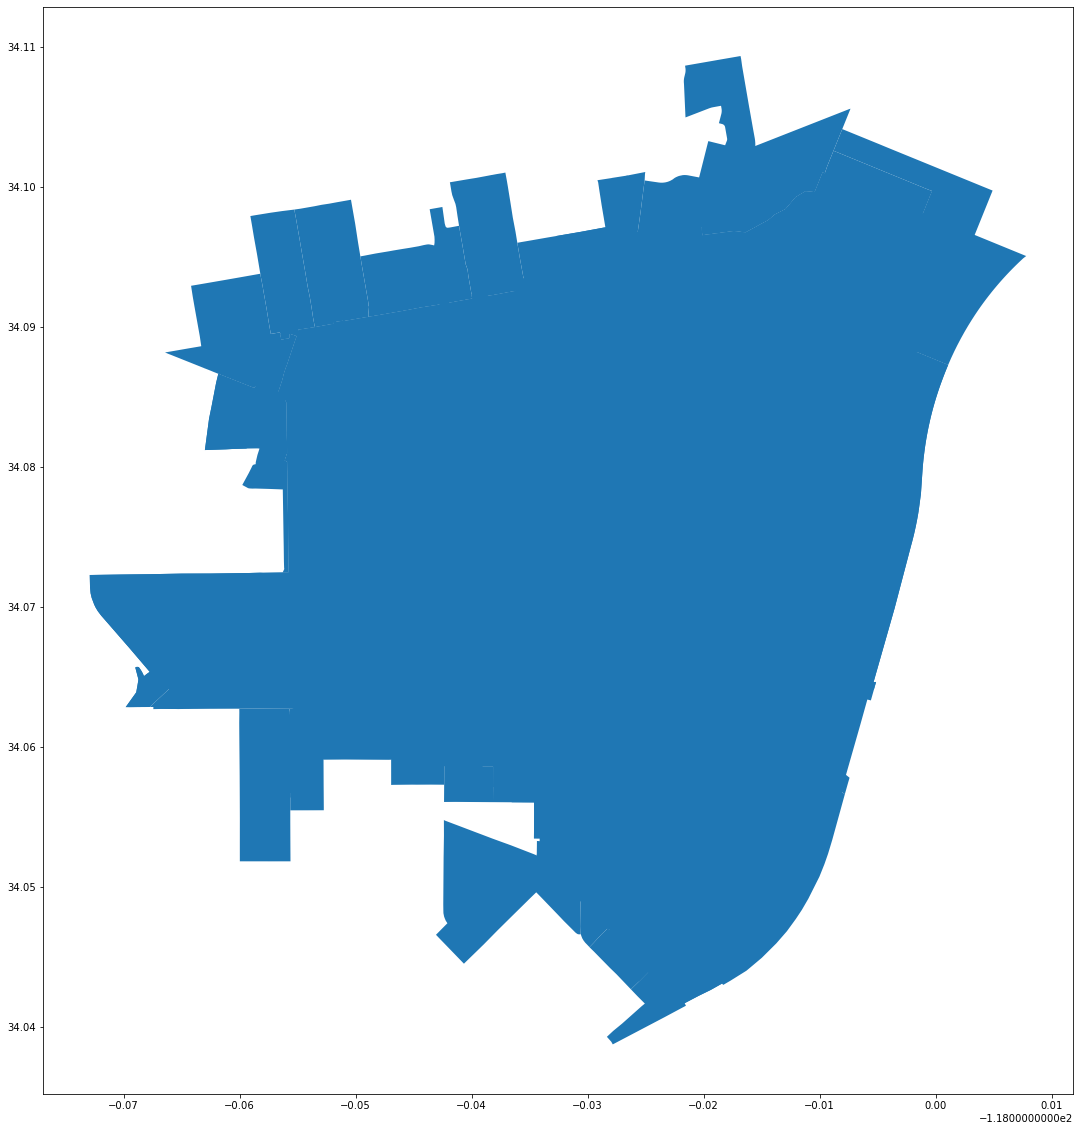

In [9]:
income.plot(figsize=(20,20))

In [10]:
#In order to undestand the relationship between income and space, I analyze the GEOIDs in the file
income.geoid.head()

0    15000US060374315011
1    15000US060374315022
2    15000US060374315023
3    15000US060374321011
4    15000US060374321012
Name: geoid, dtype: object

In [11]:
# Now I can begin dropping columns I don't need
list(income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [17]:
columns_to_keep = ['geoid',
 'name',
 'B19013001',
 'geometry']

In [18]:
# how does my data look now?
income = income[columns_to_keep]

In [19]:
income.head()

,geoid,name,B19013001,geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",33333.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",114375.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",48750.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",100469.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",88906.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


In [20]:
income.columns = ['geoid',
 'name',
 'Median Household Income',
 'geometry']

In [21]:
income.head()

,geoid,name,Median Household Income,geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",33333.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",114375.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",48750.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",100469.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",88906.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


**Sorting**

In [22]:
# I can now begin to sort my data so I can understand demographic changes by geography
income_sorted = income.sort_values(by='Median Household Income',ascending = False)

In [24]:
income_sorted[['geoid','Median Household Income']].head(10)

,geoid,Median Household Income
1,15000US060374315022,114375.0
7,15000US060374321025,113571.0
5,15000US060374321021,101875.0
3,15000US060374321011,100469.0
6,15000US060374321022,92431.0
52,15000US060374333071,90893.0
4,15000US060374321012,88906.0
26,15000US060374326023,75446.0
20,15000US060374326011,75185.0
22,15000US060374326013,74861.0


In [25]:
income.tail()

,geoid,name,Median Household Income,geometry
74,15000US060374340012,"Block Group 2, Los Angeles, CA",47029.0,"MULTIPOLYGON (((-118.01975 34.04506, -118.0195..."
75,15000US060374340031,"Block Group 1, Los Angeles, CA",62212.0,"MULTIPOLYGON (((-118.02985 34.04569, -118.0294..."
76,15000US060374340032,"Block Group 2, Los Angeles, CA",42731.0,"MULTIPOLYGON (((-118.02835 34.03929, -118.0278..."
77,15000US060374340033,"Block Group 3, Los Angeles, CA",55769.0,"MULTIPOLYGON (((-118.02365 34.05082, -118.0227..."
78,16000US0622230,"El Monte, CA",49003.0,"MULTIPOLYGON (((-118.07293 34.07227, -118.0728..."


In [27]:
# i need to drop row 78 which is for the entire City of El Monte
income = income.drop(78)

In [28]:
income.tail()

,geoid,name,Median Household Income,geometry
73,15000US060374340011,"Block Group 1, Los Angeles, CA",63452.0,"MULTIPOLYGON (((-118.02054 34.05336, -118.0198..."
74,15000US060374340012,"Block Group 2, Los Angeles, CA",47029.0,"MULTIPOLYGON (((-118.01975 34.04506, -118.0195..."
75,15000US060374340031,"Block Group 1, Los Angeles, CA",62212.0,"MULTIPOLYGON (((-118.02985 34.04569, -118.0294..."
76,15000US060374340032,"Block Group 2, Los Angeles, CA",42731.0,"MULTIPOLYGON (((-118.02835 34.03929, -118.0278..."
77,15000US060374340033,"Block Group 3, Los Angeles, CA",55769.0,"MULTIPOLYGON (((-118.02365 34.05082, -118.0227..."


<AxesSubplot:>

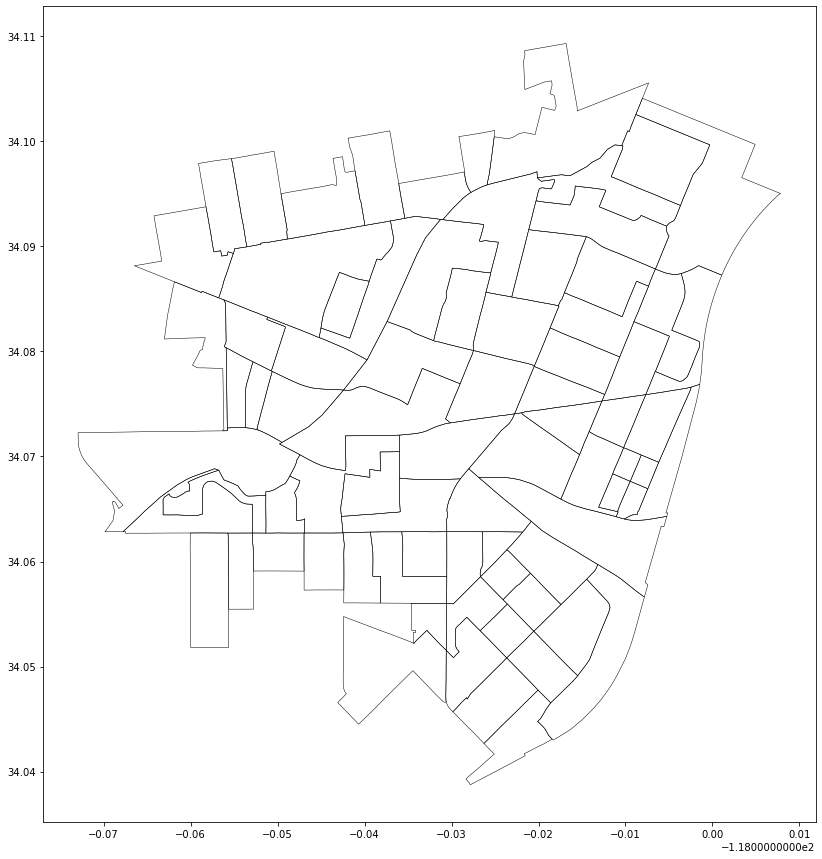

In [29]:
fig,ax = plt.subplots(figsize=(15,15))

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
income.boundary.plot(ax=ax,color='black',zorder=15,lw=0.5)

<AxesSubplot:>

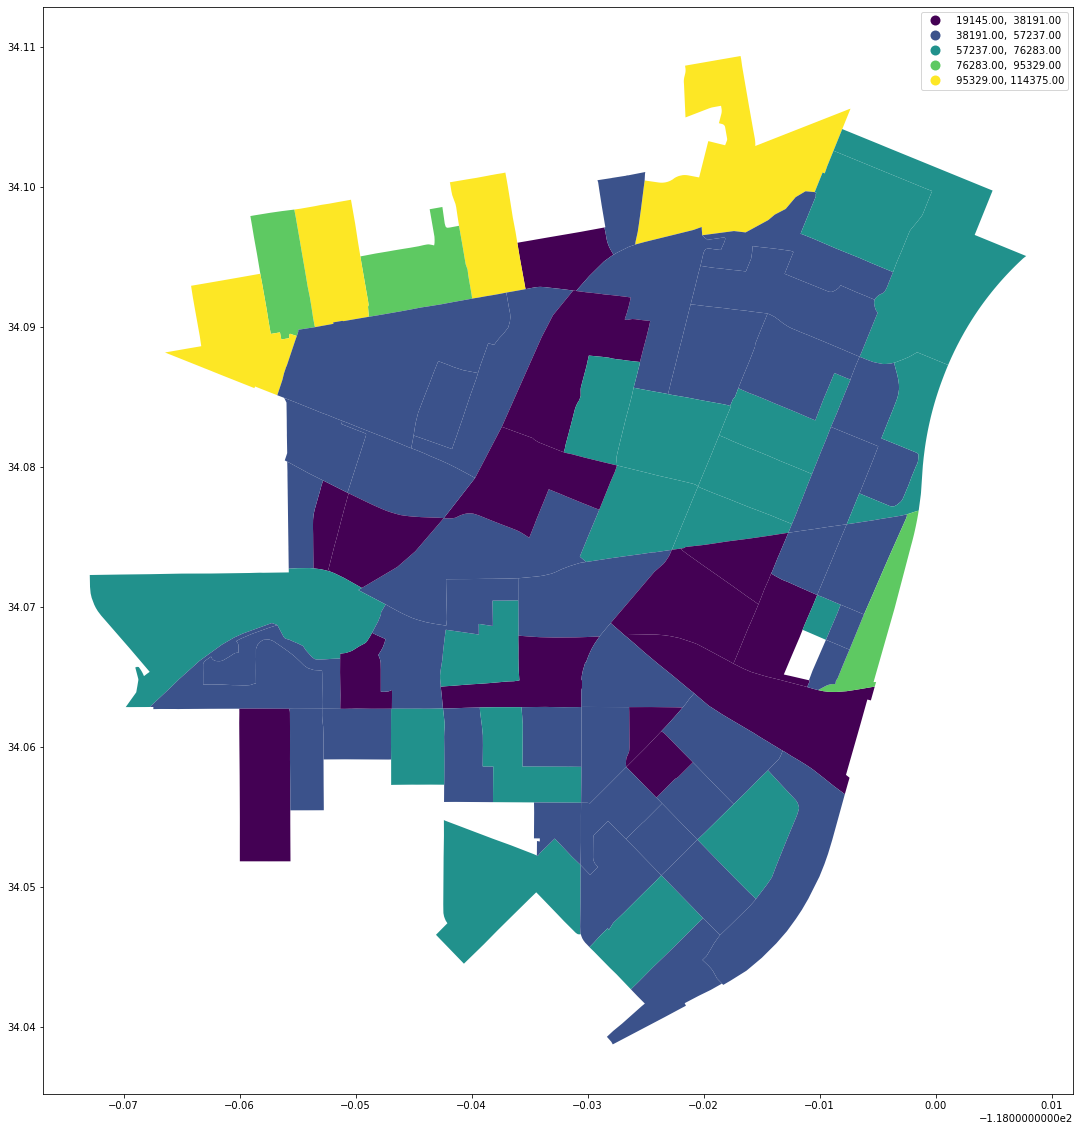

In [30]:
#now I want to map the percentage of Latinx populations since literature suggests there are high populations living in mobile homes.
income.plot(figsize=(20,20),
         column='Median Household Income',
         legend=True,
         scheme='equal_interval')

<AxesSubplot:ylabel='Frequency'>

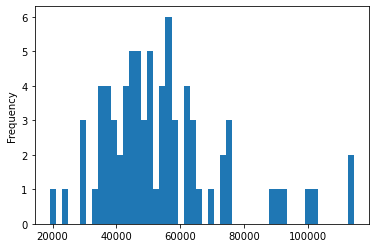

In [36]:
income['Median Household Income'].plot.hist(bins=50)

In [34]:
# reproject to web mercator
income_wm = income.to_crs(epsg=3857)

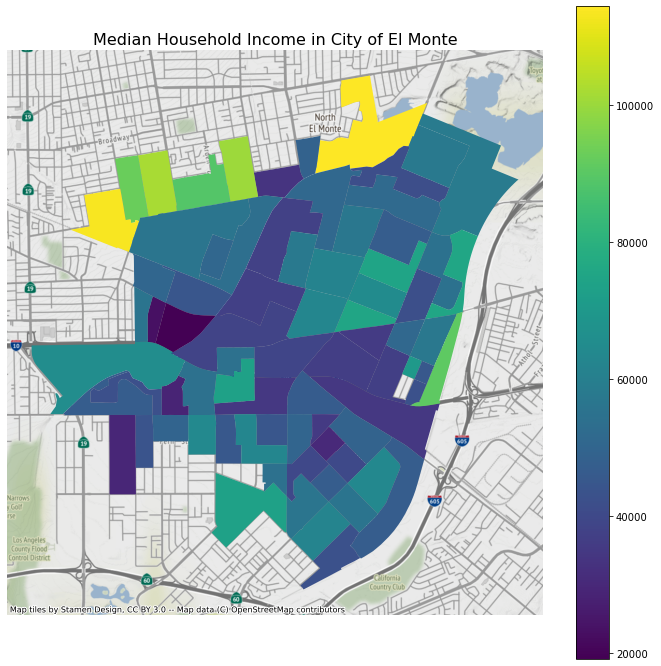

In [37]:
fig, ax = plt.subplots(figsize=(12,12))

income_wm.plot(ax=ax,
                      figsize=(20,40),
                      column='Median Household Income',
                      legend=True)

ax.axis('off')

ax.set_title('Median Household Income in City of El Monte',fontsize=16)

ctx.add_basemap(ax)

In [39]:
# Let's see if I can isolate a few block groups with household incomes below $35,000
income[income['Median Household Income'] < 35000]

,geoid,name,Median Household Income,geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",33333.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
31,15000US060374328012,"Block Group 2, Los Angeles, CA",19145.0,"MULTIPOLYGON (((-118.05234 34.07273, -118.0523..."
32,15000US060374328021,"Block Group 1, Los Angeles, CA",23194.0,"MULTIPOLYGON (((-118.05368 34.07584, -118.0536..."
36,15000US060374331011,"Block Group 1, Los Angeles, CA",28696.0,"MULTIPOLYGON (((-118.05135 34.06562, -118.0513..."
41,15000US060374332002,"Block Group 2, Los Angeles, CA",34569.0,"MULTIPOLYGON (((-118.04267 34.06429, -118.0424..."
44,15000US060374333021,"Block Group 1, Los Angeles, CA",34500.0,"MULTIPOLYGON (((-118.02684 34.06798, -118.0265..."
62,15000US060374335041,"Block Group 1, Los Angeles, CA",29500.0,"MULTIPOLYGON (((-118.06004 34.06170, -118.0600..."
69,15000US060374339013,"Block Group 3, Los Angeles, CA",30163.0,"MULTIPOLYGON (((-118.02667 34.05855, -118.0261..."


<AxesSubplot:>

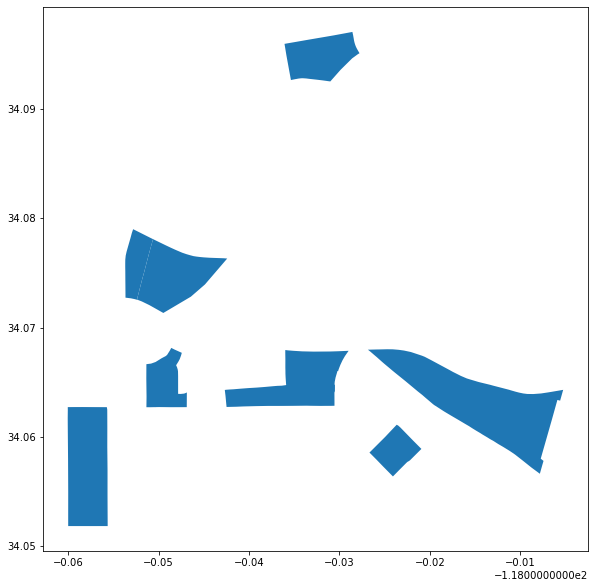

In [40]:
income[income['Median Household Income'] < 35000].plot(figsize=(12,10))

In [41]:
# reproject to Web Mercator
income_web_mercator = income.to_crs(epsg=3857)

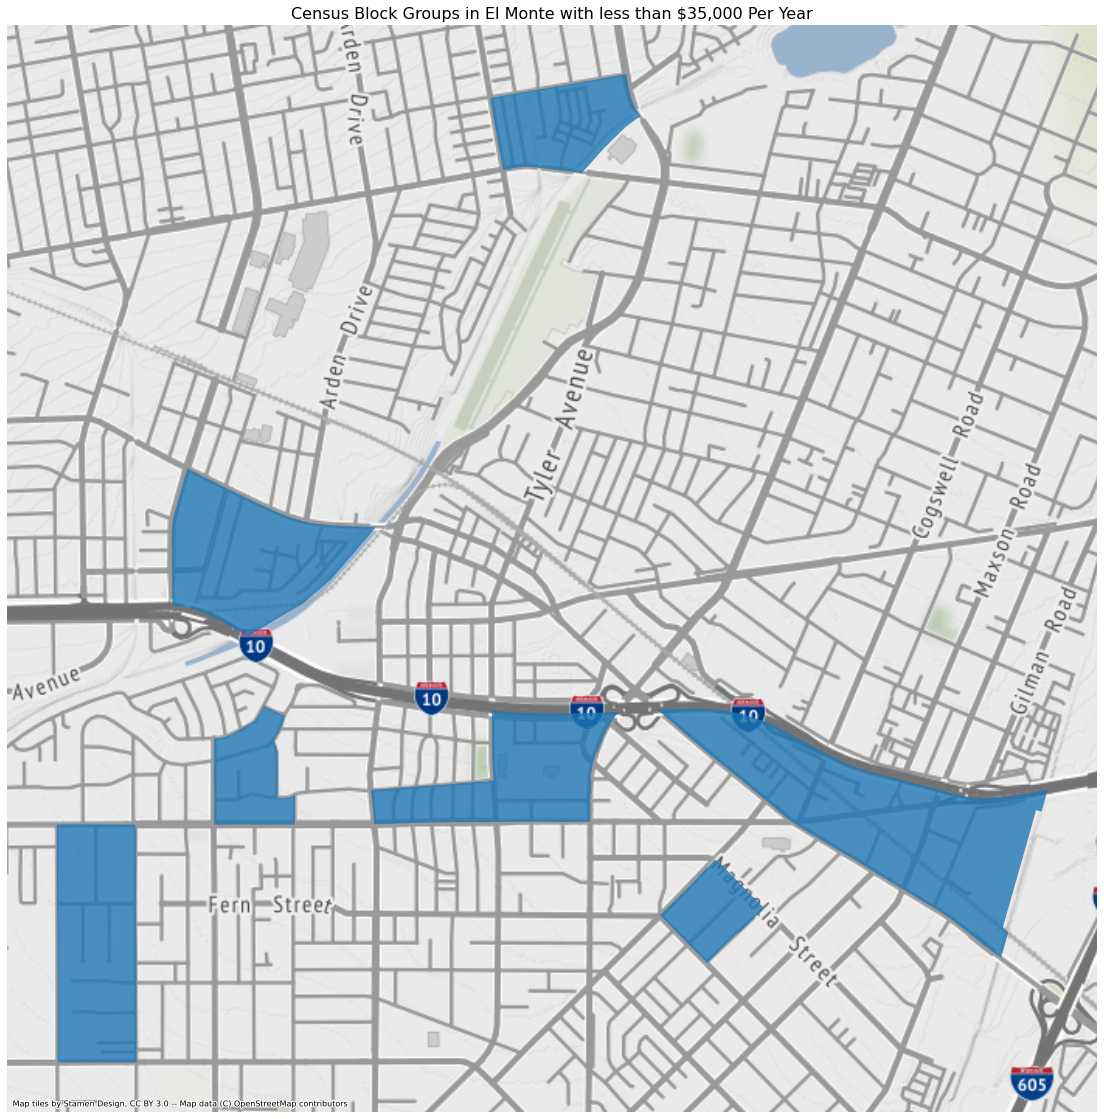

In [42]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(20, 20))

# add the layer with ax=ax in the argument 
income_web_mercator[income_web_mercator['Median Household Income'] < 35000].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Block Groups in El Monte with less than $35,000 Per Year',fontsize=16)

# add a basemap
ctx.add_basemap(ax)